# **Forecasting**

In [138]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


In [139]:
eth_df=pd.read_csv('ETH.csv')
btc_df=pd.read_csv('BTC.csv')

In [140]:
# Convert timestamp to datetime and sort
btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp'])
eth_df['timestamp'] = pd.to_datetime(eth_df['timestamp'])

btc_df.sort_values('timestamp', inplace=True)
eth_df.sort_values('timestamp', inplace=True)

# Set index for time series analysis
btc_df.set_index('timestamp', inplace=True)
eth_df.set_index('timestamp', inplace=True)


In [141]:
btc_close = btc_df['close']
eth_close = eth_df['close']

In [142]:
eth_df=pd.read_csv('ETH.csv')
btc_df=pd.read_csv('BTC.csv')

In [143]:
# Ensure timestamp is timezone-naive
btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp']).dt.tz_localize(None)

# Prepare data for Prophet
btc_prophet = btc_df.reset_index()[['timestamp', 'close']]
btc_prophet.columns = ['ds', 'y']

# Fit and forecast
model = Prophet()
model.fit(btc_prophet)

future = model.make_future_dataframe(periods=175)
forecast = model.predict(future)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2hy4dpaa/6_5qg0x8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2hy4dpaa/ux9ur3jt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67383', 'data', 'file=/tmp/tmp2hy4dpaa/6_5qg0x8.json', 'init=/tmp/tmp2hy4dpaa/ux9ur3jt.json', 'output', 'file=/tmp/tmp2hy4dpaa/prophet_modelks0qa_rr/prophet_model-20251107192700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:27:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:27:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


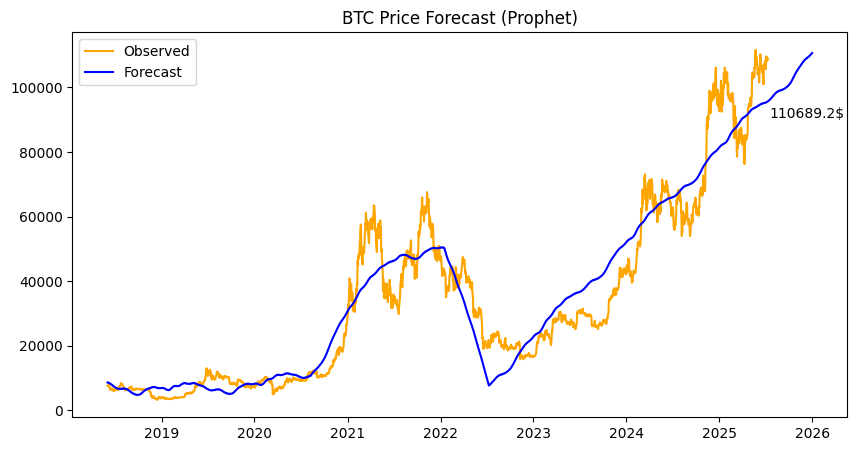

In [145]:
plt.figure(figsize=(10,5))
plt.plot(btc_close[2880:], label='Observed',color='Orange')
plt.plot(forecast['ds'][2880:],forecast['yhat'][2880:], label='Forecast', color='blue')
plt.text(x=forecast['ds'].iloc[-170],y=forecast['yhat'].iloc[-1]-20000,s=f"{forecast['yhat'].iloc[-1]:.1f}$")
plt.title('BTC Price Forecast (Prophet)')
plt.legend()
plt.show()

#**ETH Predictions**

In [146]:
eth_df=pd.read_csv('ETH.csv')

In [147]:
# Ensure timestamp is timezone-naive
eth_df['timestamp'] = pd.to_datetime(eth_df['timestamp']).dt.tz_localize(None)

# Prepare data for Prophet
eth_prophet = eth_df.reset_index()[['timestamp', 'close']]
eth_prophet.columns = ['ds', 'y']

# Fit and forecast
model = Prophet()
model.fit(eth_prophet)

future = model.make_future_dataframe(periods=175)
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2hy4dpaa/sydurdao.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2hy4dpaa/ih79h67a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2132', 'data', 'file=/tmp/tmp2hy4dpaa/sydurdao.json', 'init=/tmp/tmp2hy4dpaa/ih79h67a.json', 'output', 'file=/tmp/tmp2hy4dpaa/prophet_modela16evd0v/prophet_model-20251107192706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:27:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:27:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


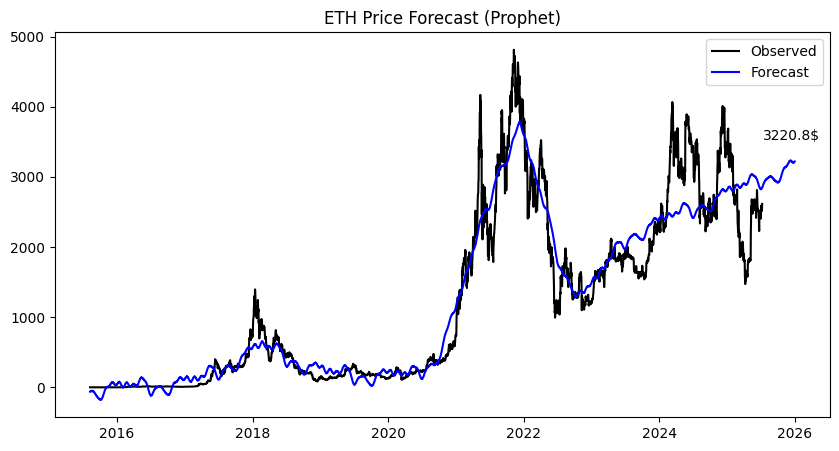

In [148]:
plt.figure(figsize=(10,5))
plt.plot(eth_close, label='Observed',color='black')
plt.plot(forecast['ds'],forecast['yhat'], label='Forecast', color='blue')
plt.text(x=forecast['ds'].iloc[-170],y=forecast['yhat'].iloc[-1]+300,s=f"{forecast['yhat'].iloc[-1]:.1f}$")
plt.title('ETH Price Forecast (Prophet)')
plt.legend()
plt.show()